# Displaying and Comparing Quantitative Data
Can use same amazon dataset as before?

In this unit, I will cover the following:
- Representing Data (e.g., Table, Graph, Objects)
- Frequency Table and Dot Plots
- Histograms
- Stem and Leaf Plots
- Shapes of Distributions
- Line Graphs

### to-do's
- Lesson 1
- Lesson 2
- Lesson 3

## Preparation

Import the required libraries

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import arviz as az # has a dot plot method built in

## Displaying Quatitative Data with Graphs

In the previous unit we broke down the differences between two major types of variables, which you can find at this [link](unit_01.ipynb), so we will not go over the definition again in this notebook.

Instead we will dive right into several ways in which we can display quantitative data:

### to-do's
- More documentation in histograms section
- Figure out how to generate right skewed data (via a transform?)
- Bimodal data?
- Annotate plots with mean and standard deviation?
- Could be good to show how the mean and standard deviation changes with different transformations
- Probably going to skip stem and leaf plots because I hate them

### Frequency Tables and Dot Plots

Instead of using a dataset, I think it could be interesting to generate some random data to for these examples.

#### Frequency Table

In [7]:
# generate a random array of numbers between 1 and 10
_min = 0 # invclusive
_max = 11 # exclusive
_size = 100
random_array = np.random.randint(_min, _max, size=_size)
random_array

array([10,  7,  0,  8,  6,  1,  5,  6,  3,  5,  8,  9,  6,  1,  3,  2,  3,
        3, 10,  7,  0,  6,  2, 10,  0,  1,  6, 10,  6,  4,  9,  5,  3,  9,
        0,  9,  8,  9,  9,  1,  3,  7,  0,  3,  7,  3,  6,  2,  2,  1,  7,
        2,  0,  7,  6,  2,  5,  2,  7,  3,  5,  8,  7,  2, 10,  1,  2,  0,
        4, 10,  4,  2,  9,  6,  7,  8,  6,  8, 10,  2,  2,  7,  6,  7,  8,
        5,  2,  0, 10,  7,  5,  2,  7,  4,  7,  1,  6,  1,  9,  0])

In [10]:
# use the Counter class to quickly generate a dictionary
counted_values = Counter(random_array)
counted_values

Counter({7: 14, 2: 14, 6: 12, 0: 9, 3: 9, 10: 8, 1: 8, 9: 8, 8: 7, 5: 7, 4: 4})

In [18]:
# store as a dataframe to represent a frequency table
frequency_table = pd.DataFrame.from_dict(counted_values, orient='index').sort_index().reset_index()

# change the column names
frequency_table.columns = ['Number', 'Count']

# return the table
frequency_table

,Number,Count
0,0,9
1,1,8
2,2,14
3,3,9
4,4,4
5,5,7
6,6,12
7,7,14
8,8,7
9,9,8


#### Dot Plot

Using the ArviZ visualization library I found through stack overflow post, I found that they have a dot plot function built into their library. The documentation can be found [here](https://python.arviz.org/en/stable/index.html).

One draw back below is that there doesn't seem to be a way to add a y-axis, and there's no mention of the fact that the points on the graph are in units of 2 counts, and will round up (i.e., show a full dot) for odd frequencies.

Nevertheless, it's nice that there's a visualization software built on top of matplotlib that has simple syntax for building a this type of visualization.

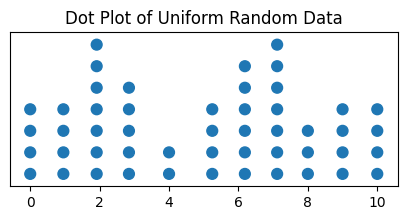

In [36]:
dot_plot = az.plot_dot(
    random_array,
    dotsize=.5,
    figsize=(5,2),
)

dot_plot.set_title('Dot Plot of Uniform Random Data');

### Histograms

Again, it could be fun to play around with some random data, so we will generate some more random data below.

In [44]:
# This time we will want the minimum to be close to zero, but not exactly zero
_min = .1
_max = 10.1
_size = 10000 # it will be good to have a large size to more closely match the distribution it's sampled from
rand_uniform = np.random.uniform(
    low=_min, 
    high=_max, 
    size=_size
    )

# generating normally distributed random data, with the same size as the array above
_loc = 5
_scale = 2
rand_normal = np.random.normal(
    loc=_loc, 
    scale=_scale, 
    size=_size
    )

#### Uniformly Distributed Data

<Axes: ylabel='Count'>

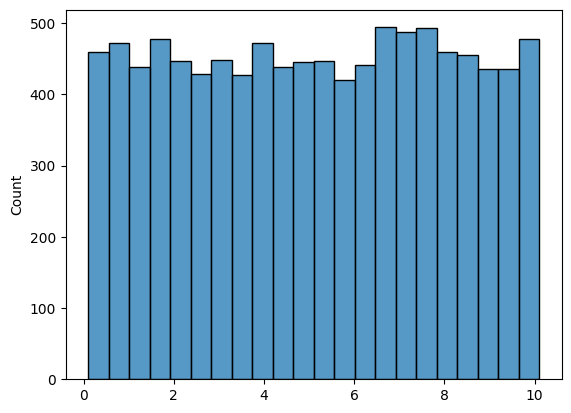

In [45]:
sns.histplot(rand_uniform)

#### Normally Distributed Data

<Axes: ylabel='Count'>

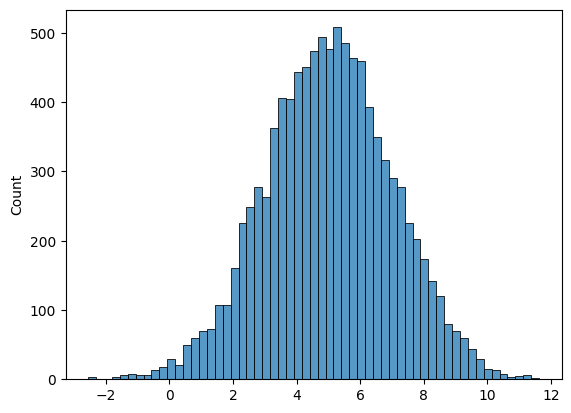

In [46]:
sns.histplot(
    rand_normal
)

#### Skewed Data

##### Left Skewed Data

<Axes: ylabel='Count'>

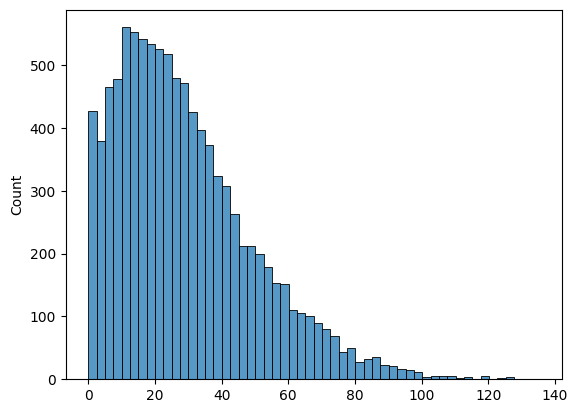

In [62]:
left_skewed = np.multiply(rand_normal,rand_normal)
sns.histplot(
    left_skewed
    )

##### Right Skewed

Need to figure out how to make this work

In [71]:
right_skewed = np.multiply(1+rand_uniform, 1+rand_uniform)

<Axes: ylabel='Count'>

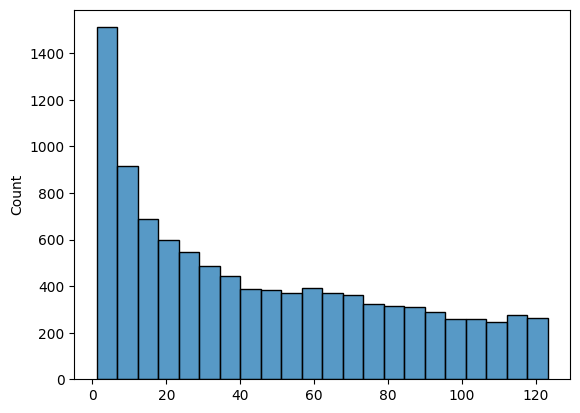

In [72]:
sns.histplot(
    right_skewed
)